In [2]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read from csv data source
customer_data = pd.read_csv('../datasets/customer-data.csv')

In [4]:
# Get 5 of head rows
customer_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [5]:
# Retun tuple of number of rows and columns 
customer_data.shape

(10000, 19)

In [6]:
# Return info (column, NN count, Data Type) on dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [7]:
# Return Statistics Infos
customer_data.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [8]:
# Display number missing values per column
customer_data.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [9]:
# Check the mean credit score for each income group
customer_data.groupby(by='income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [10]:
# Input missing values with mean credit score for each income group
def input_creditscore(income_classes):
    for income_class in income_classes:      
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class
        
        # calculate the mean for each income group
        mean = customer_data[customer_data['income'] == income_class]['credit_score'].mean()
        
        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,"credit_score"] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = customer_data['income'].unique()
input_creditscore(income_groups)

In [11]:
# check for missing values
customer_data.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [12]:
# Delete id and postal_code columns
customer_data.drop(["id","postal_code"],axis=1,inplace=True)

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       9043 non-null   float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

Count of customer for gender wise:
 gender
female    5010
male      4990
Name: count, dtype: int64



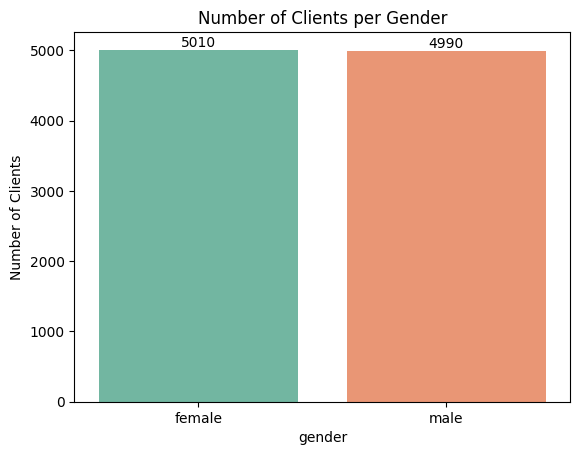

In [13]:
# Check count for each category in the gender column
print(f'Count of customer for gender wise:\n {customer_data['gender'].value_counts()}\n')

# Create a countplot to visualize the count of each category in the gender column
ax=sns.countplot(hue='gender',data=customer_data,x='gender', stat='count', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Clients per Gender')
plt.ylabel('Number of Clients')
plt.show()

In [14]:
print(f'mean: {np.mean(customer_data['credit_score'])}')
print(f'max: {np.max(customer_data['credit_score'])}')
print(f'min: {np.min(customer_data['credit_score'])}')
print(f'standar deviation: {np.std(customer_data['credit_score'])}')

mean: 0.5152471698892113
max: 0.9608188278116948
min: 0.0533575454627435
standar deviation: 0.13462143272479846


In [15]:
# Summary statistics for the credit_score column
customer_data['credit_score'].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

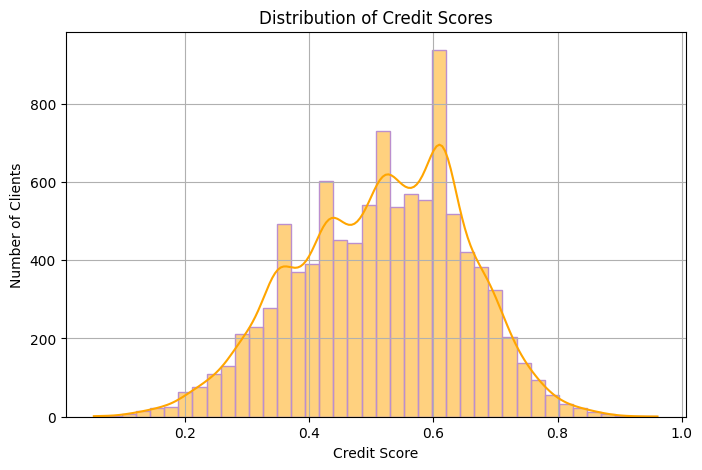

In [16]:
# Show the distribution with histogram plot 
plt.figure(figsize=[8,5])
sns.histplot(data=customer_data,x='credit_score',bins=40,color='orange',edgecolor='#BB8FCE', kde=True).set(title='Distribution of Credit Scores',
                                                                                                           xlabel='Credit Score',ylabel='Number of Clients')
plt.grid(True)
plt.show()

[Text(0.5, 1.0, 'Claim Probability by Income'),
 Text(0, 0.5, 'Claim Probability'),
 Text(0.5, 0, 'Income')]

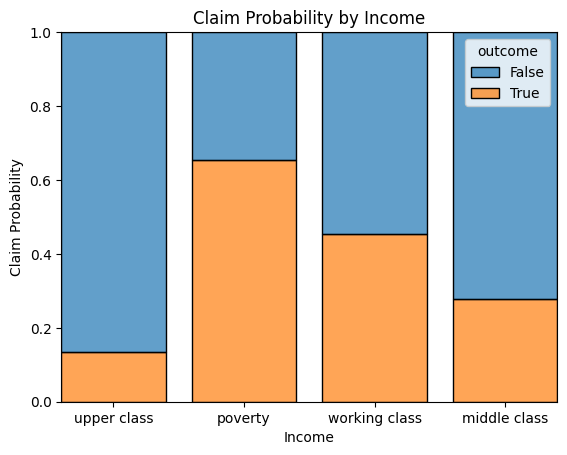

In [17]:
# Numeric-categorical analysis to show relationship between income class of clients and claim probability, based-on outcome data

ax=sns.histplot(customer_data, x='income', hue='outcome',stat='probability', multiple='fill', shrink=.8,alpha=0.7)
ax.set(title='Claim Probability by Income',ylabel='Claim Probability',xlabel='Income')

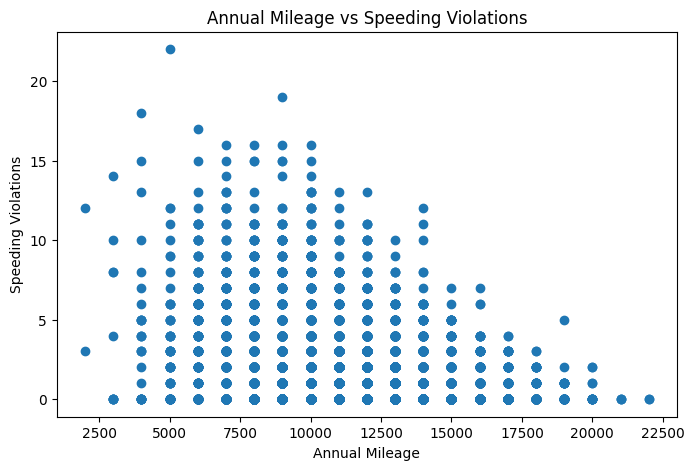

In [18]:
# Numeric-numeric analysis to show relationship between annual_mileage and speeding_violations

plt.figure(figsize=[8,5])
plt.scatter(data=customer_data,x='annual_mileage',y='speeding_violations')
plt.title('Annual Mileage vs Speeding Violations')
plt.ylabel('Speeding Violations')
plt.xlabel('Annual Mileage')
plt.show()

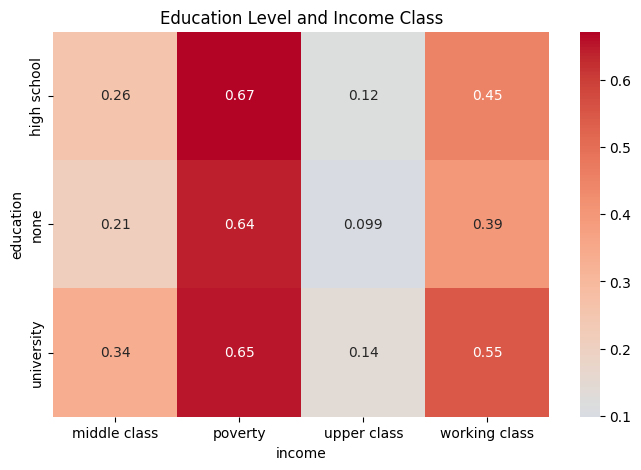

In [19]:
# Multivariate analysis to show relationship between education and income variables by using a third variable, claim rate

#Create a new "claim rate" column
customer_data['claim_rate'] = np.where(customer_data['outcome']==True,1,0)

# Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=customer_data,index='education',columns='income',values='claim_rate',aggfunc='mean')

# Create a heatmap plot to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title('Education Level and Income Class')
plt.show()
